# 1. Perkenalan 

**Nama : Dimas Furqon P.** 
**Kelas : Data Science Delta Indie Course**


# 2. Latar Belakang

## 2.a Data Overview

Obesity Prediction Dataset adalah sebuah dataset yang digunakan untuk mengestimasi level obesitas berdasarkan beberapa variabel penyebab, diantaranya : 
1. Kebiasaan/pola makan
2. Riwayat keluarga dan kondisi kesehatan.

Data tersebut diambil dari sekelompok individu yang berasal dari beberapa negara seperti, Meksiko, Peru dan Kolombia, yang mencakup 16 gaya hidup yang berhubungan dengan kesehatan dan terdiri dari 211 data/record. 
Label yang mengklasifikasikan level obesitas berdasarkan pada rentang dari "underweight" hingga pada beberapa tipe obesitas yang berbeda.

Banyak data yang dibuat melalui proses teknik sintetis, sementara beberapa data lainnya diambil langsung dari pengguna melalui web. Data ini bermanfaat untuk melakukan klasifikasi, regresi dan tugas pengelompokkan data/clustering.

Beberapa variabel yang terdapat dalam dataset ini dan dapat dianalisis antara lain: 

1. Gender : Laki-laki atau perempuan
2. Age : Usia dalam tahun
3. Height : Tinggi dalam meter
4. Weight : Bobot/Massa dalam Kilogram
5. family_history_with_overweight : Apakah orang tersebut memiliki riwayat dengan berat badan  berlebih(ya/tidak)
6. FAVC : Apakah seseorang sering mengkonsumsi makanan tinggi kalori (ya/tidak)
7. FCVC : Frekuensi mengkonsumsi buah-buahan (skala 1.sd. 3)
8. NCP : Jumlah makanan utama per hari
9. CAEC : Frekuensi mengkonsumsi cemilan diantara waktu makan (Tidak pernah, jarang, sering, selalu)
10. SMOKE : Apakah seseorang tersebut adalah perokok (ya/tidak)
11. CH2O : Konsumsi minum perhari (skala 1 s.d 3)
12. SCC : Apakah seseorang melakukan kontrol terhadap kalori harian(ya/tidak)
13. FAF : Frekuensi melakukan aktivitas fisik (skala 0 s.d 3)
14. TUE : Waktu dihabiskan menggunakan teknologi (skala 0 s.d 3)
15. CALC : Frekuensi mengkonsumsi alkohol (Tidak pernah, Jarang, Sering, Selalu)
16. MTRANS : Moda utama yang digunakan untuk transportasi (Mobil, Sepeda, Sepeda Motor, Transportasi umum, Jalan kaki)
17. NObeyesdad : Level Obesitas(Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III)

Data ini memberikan pandangan yang terstruktur tentang bagaimana perbedaan gaya hidup mempengaruhi kepada tingkat obesitas seseorang, berguna dalam analisis kesehatan dan membuat keputusan.

## 2.b Data Objective

Final Project 1 ini dibuat guna mengevaluasi konsep Machine Learning bertipe Klasifikasi dengan :

● Mampu memahami konsep Classification dengan Ensemble Model

● Mampu mempersiapkan data untuk digunakan dalam Ensemble Model

● Mampu mengimplementasikan Ensemble Model untuk membuat prediksi

# 3. Import Pustaka (Library)

In [3]:
!pip install pandas-dq

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [5]:
#untuk dataframe
import pandas as pd
import numpy as np

#untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import folium
from folium.plugins import FastMarkerCluster

#mengatur display biar maximal
pd.options.display.max_rows = None
pd.options.display.max_columns = None

#modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score # mencari accurasi 
from sklearn.metrics import confusion_matrix # membuat confusion maytris
from sklearn.metrics import classification_report # laporan klasifikasi
from sklearn.metrics import r2_score # evaluasi performa model
from sklearn.metrics import mean_squared_error # menghitung nilai error rata-rata
from imblearn.over_sampling import SMOTE #Balancing data
from sklearn.ensemble import BaggingClassifier, VotingClassifier, StackingClassifier
from pandas_dq import dq_report,Fix_DQ

# 4. Data Loading

## 4.1 Memanggil Dataset

In [6]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


## 4.2 Melihat ukuran/dimensi data (baris,kolom)

In [7]:
df.shape

(2111, 17)

## 4.3 Pengecekan nama kolom 

In [8]:
da = df.columns.values
da
dc = pd.DataFrame({'Nama kolom':da})
dc

,Nama kolom
0,Gender
1,Age
2,Height
3,Weight
4,family_history_with_overweight
5,FAVC
6,FCVC
7,NCP
8,CAEC
9,SMOKE


## 4.4 Penjelasan per kolom

In [9]:
de = np.array(['Laki-laki atau perempuan',
               'Usia dalam tahun',
               'Tinggi dalam meter',
               'Bobot/Massa dalam Kilogram',
               'Apakah orang tersebut memiliki riwayat dengan berat badan berlebih(ya/tidak)',
               'Apakah seseorang sering mengkonsumsi makanan tinggi kalori (ya/tidak)',
               'Frekuensi mengkonsumsi buah-buahan (skala 1.sd. 3)',
               'Jumlah makanan utama per hari',
               'Frekuensi mengkonsumsi cemilan diantara waktu makan (Tidak pernah, jarang, sering, selalu)',
               'Apakah seseorang tersebut adalah perokok (ya/tidak)',
               'Konsumsi minum perhari (skala 1 s.d 3)',
               'Apakah seseorang melakukan kontrol terhadap kalori harian(ya/tidak)',
               'Frekuensi melakukan aktivitas fisik (skala 0 s.d 3)',
               'Waktu dihabiskan menggunakan teknologi (skala 0 s.d 3)',
               'Frekuensi mengkonsumsi alkohol (Tidak pernah, Jarang, Sering, Selalu)',
               'Moda utama yang digunakan untuk transportasi (Mobil, Sepeda, Sepeda Motor, Transportasi umum, Jalan kaki)',
               'Level Obesitas(Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, Obesity Type III)'])

penjelasan = pd.DataFrame({'Nomor Kolom':np.arange(1,len(de) + 1,1),
                           'Nama Kolom':da,
                           'Penjelasan Kolom':de})
penjelasan.set_index('Nomor Kolom')

,Nama Kolom,Penjelasan Kolom
Nomor Kolom,,
1,Gender,Laki-laki atau perempuan
2,Age,Usia dalam tahun
3,Height,Tinggi dalam meter
4,Weight,Bobot/Massa dalam Kilogram
5,family_history_with_overweight,Apakah orang tersebut memiliki riwayat dengan berat badan berlebih(ya/tidak)
6,FAVC,Apakah seseorang sering mengkonsumsi makanan tinggi kalori (ya/tidak)
7,FCVC,Frekuensi mengkonsumsi buah-buahan (skala 1.sd. 3)
8,NCP,Jumlah makanan utama per hari
9,CAEC,"Frekuensi mengkonsumsi cemilan diantara waktu makan (Tidak pernah, jarang, sering, selalu)"


## 4.5 Tipe Data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

## 4.6 Deskriptif Statistik

In [11]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## 4.7 Pengecekan Missing Value 

In [12]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [13]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

karena data yang diperoleh dari awal sudah tidak memiliki "missing values" maka kita bisa melewatkan step untuk pembersihan missing value.

## 4.9 Pengecekan data duplikat

In [14]:
df.duplicated().sum()

24

In [15]:
df[df.duplicated()]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


setelah kita melakukan peninjauan terhadap data yang terindikasi duplikat, ternyata data tersebut bukanlah data duplikat melainkan **data yang memiliki identitas yang mirip tetapi memiliki nilai yang berbeda pada beberapa variabel**, dan berdasarkan hasil preview tersebut dapat disimpulkan bahwa data yang terindikasi duplikat adalah data yang berbeda (unik).

# 5. Eksplorasi Data Analisis

In [16]:
# Melihat sebaran data dari jenis obesitas 
panjang = len(df["NObeyesdad"].unique())
jenis = {'Nomor': np.arange(1,panjang+1,1),
         'jenis': np.array(df["NObeyesdad"].unique()),
         'jumlah': np.array(df["NObeyesdad"].value_counts())
        }
jenis
jo = pd.DataFrame(jenis)
jo.set_index('Nomor')


,jenis,jumlah
Nomor,,
1,Normal_Weight,351
2,Overweight_Level_I,324
3,Overweight_Level_II,297
4,Obesity_Type_I,290
5,Insufficient_Weight,290
6,Obesity_Type_II,287
7,Obesity_Type_III,272


NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


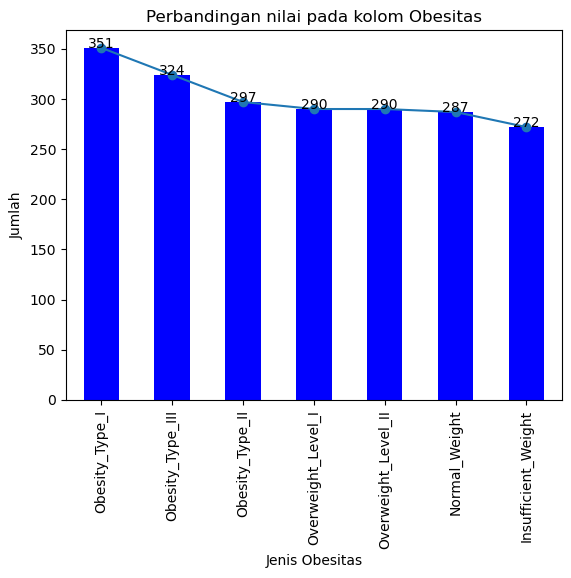

In [17]:
# Menghitung jumlah kemunculan setiap nilai dalam kolom "Kematian" dalam DataFrame "df"
value_counts = df["NObeyesdad"].value_counts()

# Membuat grafik batang dengan menggunakan fungsi plot()

value_counts.plot(kind="bar", color = 'Blue')

# Annotate data points with labels
x = jo["jenis"]
y = jo["jumlah"]

plt.plot(x,y,marker='o')

# Menambahkan data label
for i, value in enumerate(y):
    plt.text(i, value + 0.1, str(value), ha='center')

# Memberikan judul pada grafik
plt.title("Perbandingan nilai pada kolom Obesitas")

# Memberikan label sumbu x
plt.xlabel("Jenis Obesitas")

# Memberikan label sumbu y
plt.ylabel("Jumlah")

# Menampilkan jumlah kemunculan setiap nilai pada kolom "Jenis Obesitas"
print(value_counts)

# Memunculkan Grafik 
plt.show()


## 5.1 Kesimpulan

dari grafik batang diatas dapat disimpulkan bahwa jenis obesitas yang paling terjadi adalah Obesity_TypeI sebanyak 351 Kejadian, dan jenis obesitas yang paling rendah terjadi adalah insufficient_weight dengan jumlah kejadian sebanyak 272 kejadian.

Kolom **"NObeyesdad"** atau kolom **Jenis Obesitas** akan dijadikan kolom target, dan dari grafik diatas dapat terlihat bahwa kolom ini memiliki kelas yang sebarannya tidak merat, yaitu salah satu kelas lebih sedikit dibandingkan dengan kelas lainnya, hal ini dapat dipertimbangkan apakah perlu dilakukan balancing/resampling untuk data ini.

## 5.2 Barplot

Untuk menampilkan hubungan antara kolom penyebab/independen dengan kolom target/dependen, dapat dilihat hubungannya melalui grafik batang yang akan ditampilkan 

In [44]:
penjelasan

,Nomor Kolom,Nama Kolom,Penjelasan Kolom
0,1,Gender,Laki-laki atau perempuan
1,2,Age,Usia dalam tahun
2,3,Height,Tinggi dalam meter
3,4,Weight,Bobot/Massa dalam Kilogram
4,5,family_history_with_overweight,Apakah orang tersebut memiliki riwayat dengan berat badan berlebih(ya/tidak)
5,6,FAVC,Apakah seseorang sering mengkonsumsi makanan tinggi kalori (ya/tidak)
6,7,FCVC,Frekuensi mengkonsumsi buah-buahan (skala 1.sd. 3)
7,8,NCP,Jumlah makanan utama per hari
8,9,CAEC,"Frekuensi mengkonsumsi cemilan diantara waktu makan (Tidak pernah, jarang, sering, selalu)"
9,10,SMOKE,Apakah seseorang tersebut adalah perokok (ya/tidak)


### 5.2.a membandingkan kolom "Jenis Obesitas" dengan "Jenis Kelamin"

In [52]:
df[['NObeyesdad','Gender']]

,NObeyesdad,Gender
0,Normal_Weight,Female
1,Normal_Weight,Female
2,Normal_Weight,Male
3,Overweight_Level_I,Male
4,Overweight_Level_II,Male
...,...,...
2106,Obesity_Type_III,Female
2107,Obesity_Type_III,Female
2108,Obesity_Type_III,Female
2109,Obesity_Type_III,Female


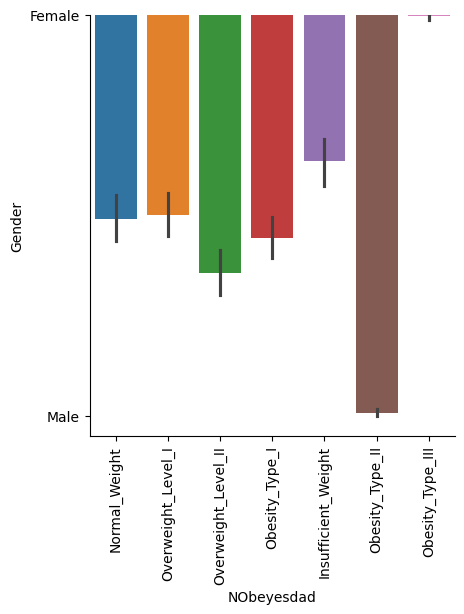

In [56]:
# Memilih kolom 'Gender' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['NObeyesdad','Gender']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'jenis kelamin' sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'Gender', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

**Kesimpulan**

Dari barplot di atas, dapat disimpulkan bahwa resiko obesitas akan cenderung meningkat kepada orang yang berjenis kelamin laki-laki dibandingkan dengan perempuan.

### 5.2.b membandingkan kolom "Jenis Obesitas" dengan "Usia"

In [20]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

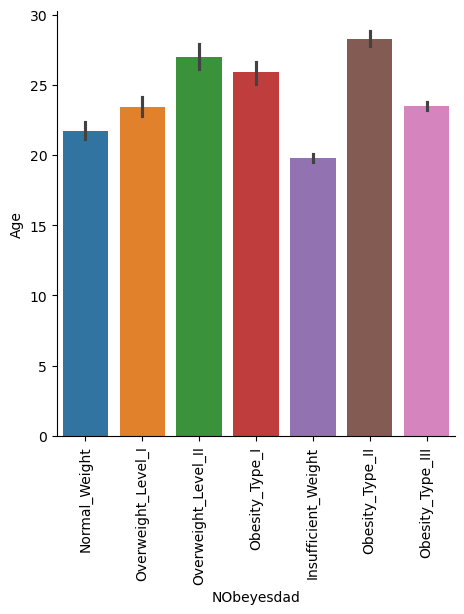

In [21]:
# Memilih kolom 'Age' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['NObeyesdad','Age']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'umur' sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'Age', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

**Kesimpulan**

Dari bar diatas dapat dilihat bahwa kecenderungan usia yang semakin meningkat, akan semakin meningkatkan resiko obesitas pada level yang lebih tinggi.

### 5.2.c membandingkan kolom "Jenis Obesitas" dengan "Tinggi"

In [22]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

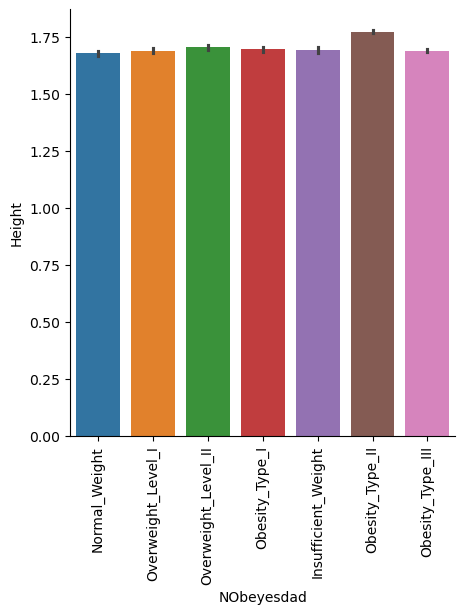

In [23]:
# Memilih kolom 'Height' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['NObeyesdad','Height']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'tinggi' sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'Height', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

**Kesimpulan**

Dari gambar diatas dapat diketahui bahwa sebaran jenis obesitas hampir tidak berpengaruh terhadap postur tinggi badan, hanya saja seseorang dengan tinggi 175 cm lebih rawan untuk terkena Obesitas Tipe II

### 5.2.d membandingkan kolom "Jenis Obesitas" dengan "Berat badan"

In [24]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

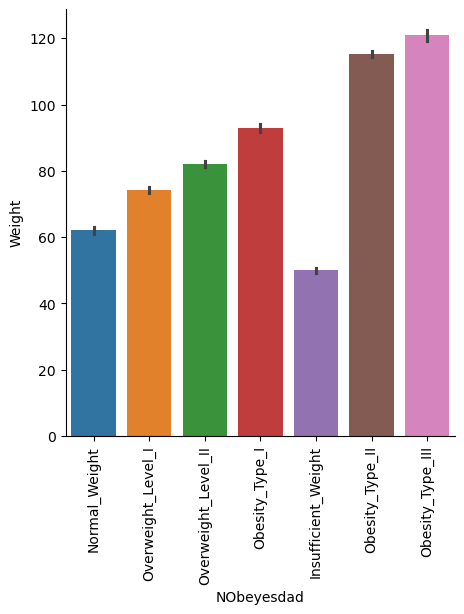

In [25]:
# Memilih kolom 'Weight' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['NObeyesdad','Weight']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'berat badan' sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'Weight', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

**Kesimpulan**

Dapat terlihat sangat jelas bahwa tingkat keparahan obesitas akan semakin meningkat seiring dengan peningkatan berat badan seseorang.

### 5.2.e membandingkan kolom "Jenis Obesitas" dengan "Riwayat obesitas"

In [26]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

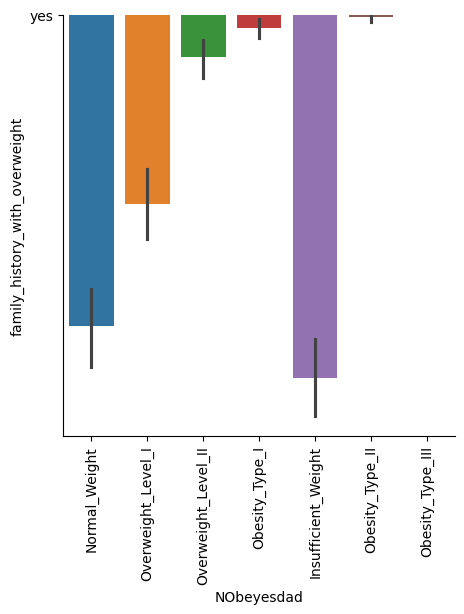

In [27]:
# Memilih kolom 'family_history_with_overweight' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['family_history_with_overweight','NObeyesdad']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'Riwayat obesitas' sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'family_history_with_overweight', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

**Kesimpulan**

Dari chart di atas dapat terlihat bahwa sumbu y yang semakin menuju titik 0 menandakan bahwa tidak adanya riwayat keluarga yang memiliki diabetes. Hal itu menunjukan juga bahwa orang yang tidak memiliki riwayat obesitas keluarga, memiliki kecenderungan lebih tinggi terhadap berat badan normal ataupun berat badan kurang.

### 5.2.f membandingkan kolom "Jenis Obesitas" dengan "Konsumsi Makan Kalori tinggi"

In [28]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

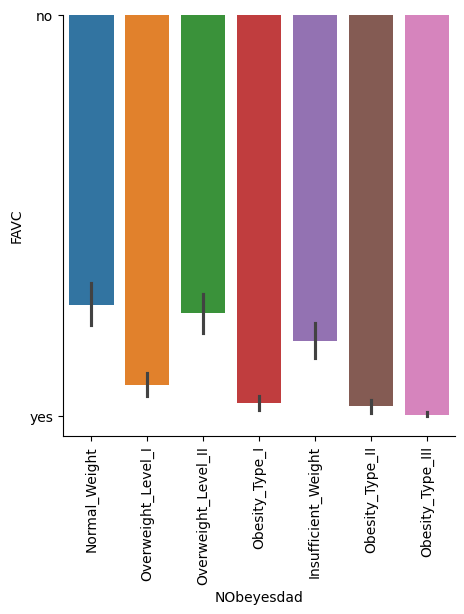

In [29]:
# Memilih kolom 'FAVC' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['NObeyesdad','FAVC']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'FAVC' sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'FAVC', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

**Kesimpulan**

Berdasarkan gambar diatas juga dapat disimpulkan bahwa potensi tertinggi seseorang untuk terkena obesitas semakin meningkat apabila orang tersebut gemar mengkonsumsi makanan yang berkalori tinggi.

### 5.2.g membandingkan kolom "Jenis Obesitas" dengan "Konsumsi buah-buahan"

In [30]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

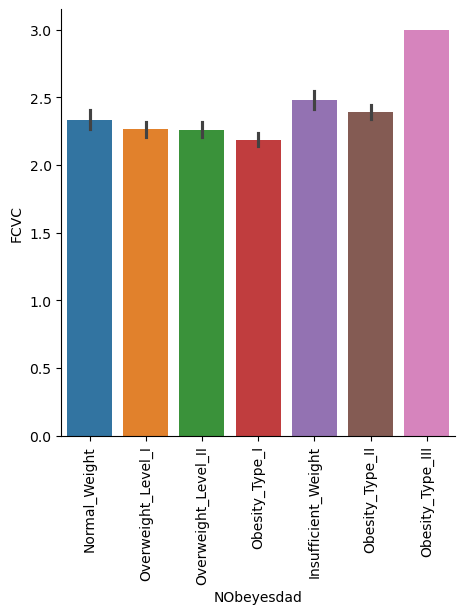

In [31]:
# Memilih kolom 'FCVC' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['NObeyesdad','FCVC']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'FCVC' sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'FCVC', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

**Kesimpulan**

Berdasarkan grafik dapat terlihat bahwa kemungkinan orang yang mengkonsumsi buah-buahan lebih banyak akan menurunkan resiko untuk mendapatkan obesitas, namun begitu ada sedikit anomali pada orang dengan obesitas tipe 3 yang justru meningkatkan peluang obesitas sedangkan konsumsi buah-buahan yang dilakukan berada pada angka yang cukup tinggi. Oleh karena itu perlu dilakukan pengecekan lebih lanjut untuk mendeteksi apakah ada outlier/data yang tidak valid.

### 5.2.h membandingkan kolom "Jenis Obesitas" dengan "Jumlah makanan utama per hari"

In [32]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

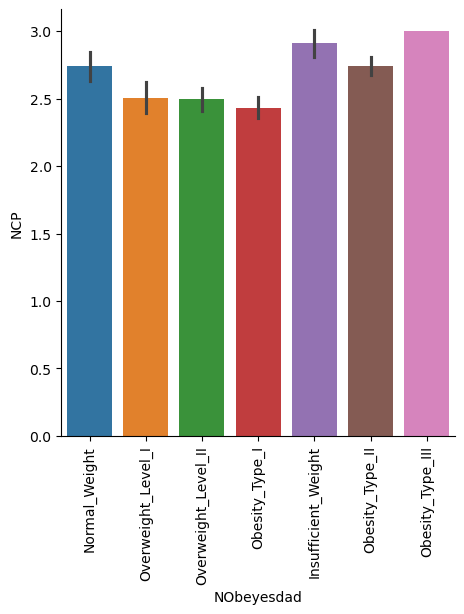

In [33]:
# Memilih kolom 'NCP' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['NObeyesdad','NCP']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'NCP' sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'NCP', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

**Kesimpulan**

Data diatas menunjukkan bahwa jumlah makan utama per hari meningkatkan resiko pada tingkat obesitas yang lebih tinggi yang berlaku pada orang yang berstatus obesitas, tidak berlaku bagi orang dengan berat badan normal maupun berat badan kurang.

### 5.2.i membandingkan kolom "Jenis Obesitas" dengan "Frekuensi cemilan diantara makan utama"

In [34]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

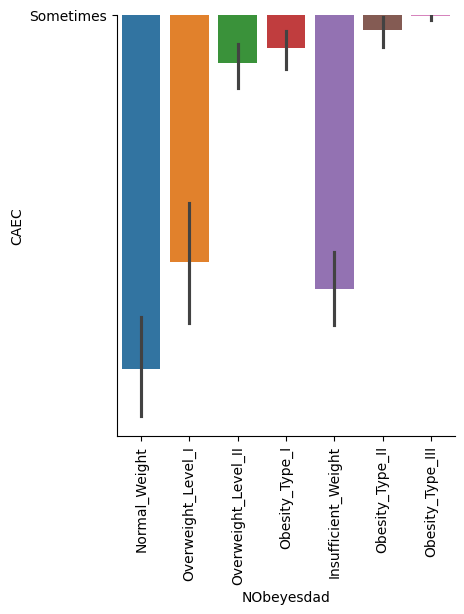

In [35]:
# Memilih kolom 'CAEC' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['NObeyesdad','CAEC']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'CAEC' sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'CAEC', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

**Kesimpulan**

Dari data diatas terlihat bahwa frekuensi cemilan diantara makan utama akan meningkatkan resiko obesitas pada tingkat yang lebih tinggi


### 5.2.j membandingkan kolom "Jenis Obesitas" dengan "Konsumsi Rokok"

In [36]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

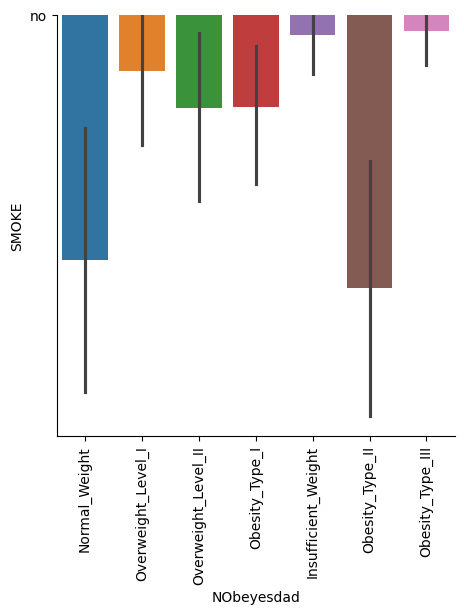

In [37]:
# Memilih kolom 'SMOKE' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['NObeyesdad','SMOKE']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'SMOKE' sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'SMOKE', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

**Kesimpulan**

Berdasarkan grafik diatas nampak bahwa kejadian tertinggi untuk obesitas pada perokok adalah pada obesitas tipe 2 sedangkan untuk tingkat yang lain umumnya tidak terlalu berpengaruh.

### 5.2.k membandingkan kolom "Jenis Obesitas" dengan "Konsumsi minum air per hari"

In [38]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

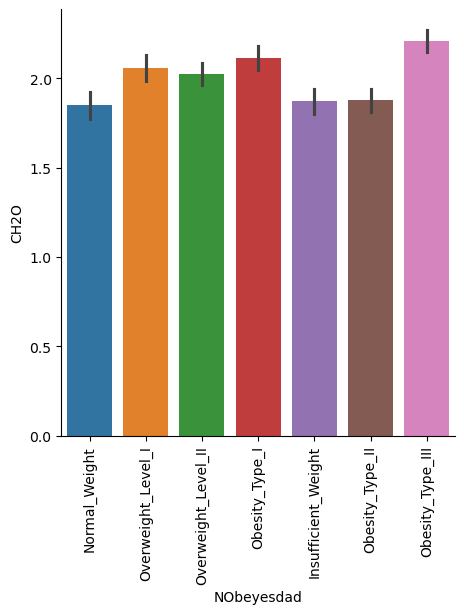

In [39]:
# Memilih kolom 'CH2O' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['NObeyesdad','CH2O']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'CH2O' sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'CH2O', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

**Kesimpulan**

Frekuensi minum air pada penderita obesitas umumnya akan meningkatkan tingkat obesitas.

### 5.2.l membandingkan kolom "Jenis Obesitas" dengan "Kontrol kalori harian"

In [60]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

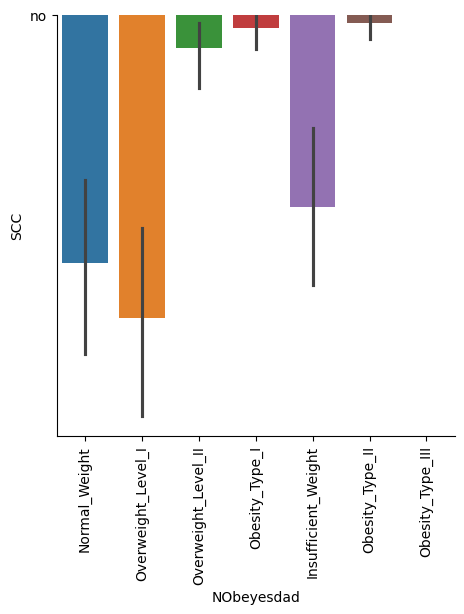

In [61]:
# Memilih kolom 'SCC' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['NObeyesdad','SCC']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'SCC' sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'SCC', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

**Kesimpulan**


### 5.2.m membandingkan kolom "Jenis Obesitas" dengan "Frekuensi aktifitas fisik"

In [38]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

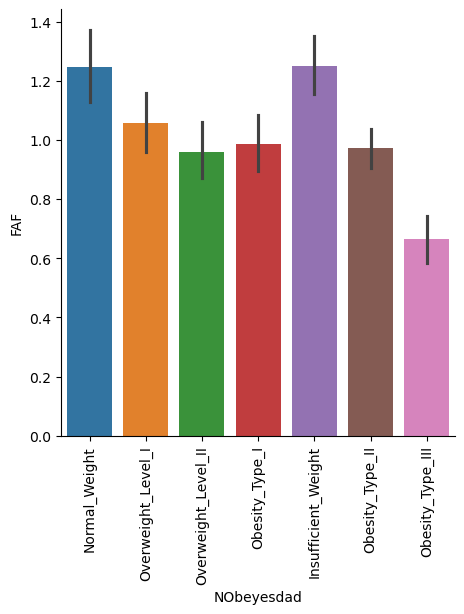

In [41]:
# Memilih kolom 'FAF' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['NObeyesdad','FAF']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'FAF' sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'FAF', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

### 5.2.n membandingkan kolom "Jenis Obesitas" dengan "Waktu yang dihabiskan untuk teknologi"

In [38]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

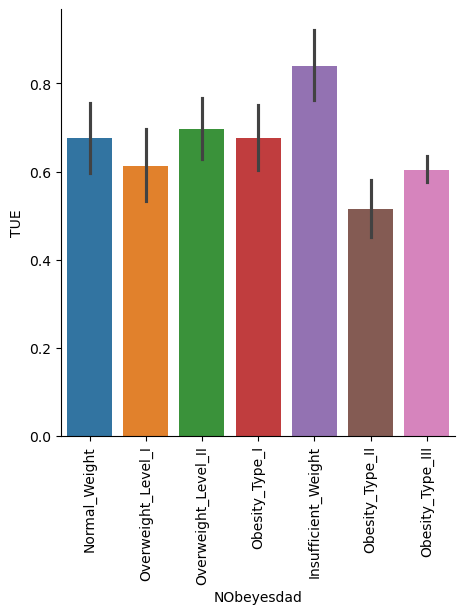

In [43]:
# Memilih kolom 'TUE' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['NObeyesdad','TUE']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'TUE'sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'TUE', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

### 5.2.o membandingkan kolom "Jenis Obesitas" dengan "Frekuensi mengonsumsi alkohol"

In [38]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

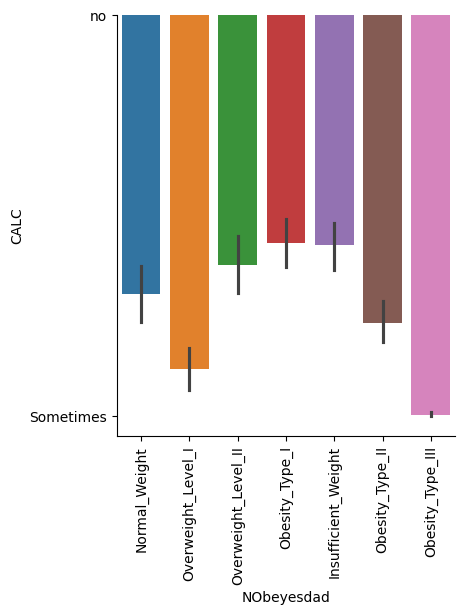

In [46]:
# Memilih kolom 'CALC' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['NObeyesdad','CALC']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'CALC'sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'CALC', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

### 5.2.p membandingkan kolom "Jenis Obesitas" dengan "Moda Utama yang digunakan dalam Transportasi"

In [38]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

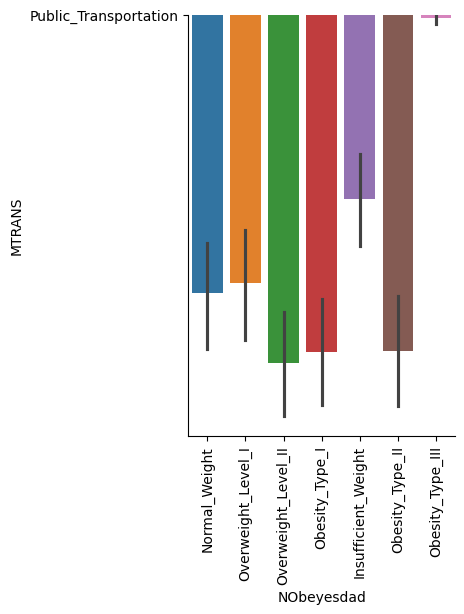

In [47]:
# Memilih kolom 'MTRANS' dan 'Jenis Obesitas' dari DataFrame 'df'
df[['NObeyesdad','MTRANS']]

# Membuat grafik batang menggunakan seaborn catplot dengan menggunakan kolom 'Jenis Obesitas' sebagai sumbu x dan 'MTRANS'sebagai sumbu y
sns.catplot(data=df, x='NObeyesdad', y= 'MTRANS', hue='NObeyesdad', kind='bar')

# Mengatur label pada sumbu x
plt.xticks(rotation=90, ticks=(0,1,2,3,4,5,6), labels= np.array(df["NObeyesdad"].unique()))
plt.show()

In [ ]:
## 5.3. 